# DAT565 Introduction to Data Science and AI 

- Student 1 - Luca Modica - (5 hours)
- Student 2 - Hugo Alves Henriques E Silva - (5 hours)
- Student 3 - YenPo Lin - (5 hours)

## 2023-2024, LP1
## Assignment 5: Reinforcement Learning and Classification

The exercise takes place in a notebook environment where you can chose to use Jupyter or Google Colabs. We recommend you use Google Colabs as it will facilitate remote group-work and makes the assignment less technical. 

The exercise takes place in this notebook environment where you can chose to use Jupyter or Google Colabs. We recommend you use Google Colabs as it will facilitate remote group-work and makes the assignment less technical. 

*Tips:* 
* You can execute certain Linux shell commands by prefixing the command with a `!`. 
* You can insert Markdown cells and code cells. The first you can use for documenting and explaining your results, the second you can use to write code snippets that execute the tasks required.  

This assignment is about **sequential decision making** under uncertainty (reinforcement learning). In a sequential decision process, the process jumps between different states (the *environment*), and in each state the decision maker, or *agent*, chooses among a set of actions. Given the state and the chosen action, the process jumps to a new state. At each jump the decision maker receives a reward, and the objective is to find a sequence of decisions (or an optimal *policy*) that maximizes the accumulated rewards.

We will use **Markov decision processes** (MDPs) to model the environment, and below is a primer on the relevant background theory. 



* To make things concrete, we will first focus on decision making under **no** uncertainity (questions 1 and 2), i.e, given we have a world model, we can calculate the exact and optimal actions to take in it. We will first introduce **Markov Decision Process (MDP)** as the world model. Then we give one algorithm (out of many) to solve it.

* (optional) Next we will work through one type of reinforcement learning algorithm called Q-learning (question 3). Q-learning is an algorithm for making decisions under uncertainity, where uncertainity is over the possible world model (here MDP). It will find the optimal policy for the **unknown** MDP, assuming we do infinite exploration.

* Finally, in question 4 you will be asked to explain differences between reinforcement learning and supervised learning and in question 5 write about decision trees and random forests.

## Primer
### Decision Making
The problem of **decision making under uncertainty** (commonly known as **reinforcement learning**) can be broken down into
two parts. First, how do we learn about the world? This involves both the
problem of modeling our initial uncertainty about the world, and that of drawing conclusions from evidence and our initial belief. Secondly, given what we
currently know about the world, how should we decide what to do, taking into
account future events and observations that may change our conclusions?
Typically, this will involve creating long-term plans covering possible future
eventualities. That is, when planning under uncertainty, we also need to take
into account what possible future knowledge could be generated when implementing our plans. Intuitively, executing plans which involve trying out new
things should give more information, but it is hard to tell whether this information will be beneficial. The choice between doing something which is already
known to produce good results and experiment with something new is known
as the **exploration-exploitation dilemma**.

### The exploration-exploitation trade-off

Consider the problem of selecting a restaurant to go to during a vacation. Lets say the
best restaurant you have found so far was **Les Epinards**. The food there is
usually to your taste and satisfactory. However, a well-known recommendations
website suggests that **King’s Arm** is really good! It is tempting to try it out. But
there is a risk involved. It may turn out to be much worse than **Les Epinards**,
in which case you will regret going there. On the other hand, it could also be
much better. What should you do?
It all depends on how much information you have about either restaurant,
and how many more days you’ll stay in town. If this is your last day, then it’s
probably a better idea to go to **Les Epinards**, unless you are expecting **King’s
Arm** to be significantly better. However, if you are going to stay there longer,
trying out **King’s Arm** is a good bet. If you are lucky, you will be getting much
better food for the remaining time, while otherwise you will have missed only
one good meal out of many, making the potential risk quite small.

### Markov Decision Processes
Markov Decision Processes (MDPs) provide a mathematical framework for modeling sequential decision making under uncertainty. An *agent* moves between *states* in a *state space* choosing *actions* that affects the transition probabilities between states, and the subsequent *rewards* recieved after a jump. This is then repeated a finite or infinite number of epochs. The objective, or the *solution* of the MDP, is to optimize the accumulated rewards of the process.

Thus, an MDP consists of five parts: 

* Decision epochs: $t={1,2,...,T}$, where $T\leq \infty$
* State space: $S=\{s_1,s_2,...,s_N\}$ of the underlying environment
* Action space $A=\{a_1,a_2,...,a_K\}$ available to the decision maker at each decision epoch
* Transition probabilities $p(s_{t+1}|s_t,a_t)$ for jumping from state $s_t$ to state $s_{t+1}$ after taking action $a_t$
* Reward functions $R_t = r(a_t,s_t,s_{t+1})$ resulting from the chosen action and subsequent transition

A *decision policy* is a function $\pi: s \rightarrow a$, that gives instructions on what action to choose in each state. A policy can either be *deterministic*, meaning that the action is given for each state, or *randomized* meaning that there is a probability distribution over the set of possible actions for each state. Given a specific policy $\pi$ we can then compute the the *expected total reward* when starting in a given state $s_1 \in S$, which is also known as the *value* for that state, 

$$V^\pi (s_1) = E\left[ \sum_{t=1}^{T} r(s_t,a_t,s_{t+1}) {\Large |} s_1\right] = \sum_{t=1}^{T} r(s_t,a_t,s_{t+1}) p(s_{t+1} | a_t,s_t)$$ 

where $a_t = \pi(s_t)$. To ensure convergence and to control how much credit to give to future rewards, it is common to introduce a *discount factor* $\gamma \in [0,1]$. For instance, if we think all future rewards should count equally, we would use $\gamma = 1$, while if we value near-future rewards higher than more distant rewards, we would use $\gamma < 1$. The expected total *discounted* reward then becomes

$$V^\pi( s_1) = \sum_{t=1}^T \gamma^{t-1} r(s_t,a_t, s_{t+1}) p(s_{t+1} | s_t, a_t) $$

Now, to find the *optimal* policy we want to find the policy $\pi^*$ that gives the highest total reward $V^*(s)$ for all $s\in S$. That is, we want to find the policy where

$$V^*(s) \geq V^\pi(s), s\in S$$

To solve this we use a dynamic programming equation called the *Bellman equation*, given by

$$V(s) = \max_{a\in A} \left\{\sum_{s'\in S} p(s'|s,a)( r(s,a,s') +\gamma V(s')) \right\}$$

It can be shown that if $\pi$ is a policy such that $V^\pi$ fulfills the Bellman equation, then $\pi$ is an optimal policy.

A real world example would be an inventory control system. The states could be the amount of items we have in stock, and the actions would be the amount of items to order at the end of each month. The discrete time would be each month and the reward would be the profit. 


## Question 1

The first question covers a deterministic MPD, where the action is directly given by the state, described as follows:

* The agent starts in state **S** (see table below)
* The actions possible are **N** (north), **S** (south), **E** (east), and **W** west. 
* The transition probabilities in each box are deterministic (for example P(s'|s,N)=1 if s' north of s). Note, however, that you cannot move outside the grid, thus all actions are not available in every box.
* When reaching **F**, the game ends (absorbing state).
* The numbers in the boxes represent the rewards you receive when moving into that box. 
* Assume no discount in this model: $\gamma = 1$
    
    
| -1 | 1  | F  |
| 0  | -1 | 1  |
| -1 | 0  | -1 |
| S  | -1 | 1  |

Let $(x,y)$ denote the position in the grid, such that $S=(0,0)$ and $F=(2,3)$.

**1a)** What is the optimal path of the MDP above? Is it unique? Submit the path as a single string of directions. For instance, NESW will make a circle.

**1b)** What is the optimal policy (i.e., the optimal action in each state)? It is helpful if you draw the arrows/letters in the grid.

**1c)** What is expected total reward for the policy in 1a)?


---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
num_rows = 3
num_cols = 4

grid = {
    (0, 3): -1, (1, 3): 1, (2, 3): 0,
    (0, 2): 0, (1, 2): -1, (2, 2): 1,
    (0, 1): -1, (1, 1): 0, (2, 1): -1,
    (0, 0): 0, (1, 0): -1, (2, 0): 1,
}

moves = {'N': (0, 1), 'S': (0, -1), 'E': (1, 0), 'W': (-1, 0)}

start = (0,0)
end = (2, 3)

### Question 1a 

In [3]:
def move_pos(pos, move):
    # create a copy of the position and move it
    x, y = pos

    new = (x + moves[move][0], y + moves[move][1])

    if (new[0] < 0 or new[0] > 2 or new[1] < 0 or new[1] > 3):
        # dont move, out of boundaries
        return pos
    return new

In [4]:
def findPath(grid, position, end, prev_moves, paths, rewards, reward, visited = None):
    """
    find all paths going from a position to the end,
    with all the related accumulated rewards
    """

    if visited is None:
        visited = set()
    visited.add(position)

    move_names = [key for key in moves] 
    for move in move_names:
        new_pos = move_pos(position, move)
        if new_pos in visited:
            # dont go to visited positions
            continue
        if new_pos == end:
            # found a path
            paths.append(prev_moves + move)
            rewards.append(reward)
        else:
            findPath(grid, new_pos, end, prev_moves + move, paths, rewards, reward + grid[new_pos], visited.copy())

    return paths, rewards

In [5]:
paths, rewards = findPath(grid, start, end, '', [], [], 0)

data = {'path': paths, 'total_reward': rewards}
df = pd.DataFrame(data).sort_values(by='total_reward', ascending=False)

max_reward = df['total_reward'].max()

# show the optimal path
df[df['total_reward'] == max_reward]

,path,total_reward
27,EENNN,0
28,EENNWNE,0


There 2 optimal paths, hence not a unique optimal one:

- E -> E -> N -> N -> N
- E -> E -> N -> N -> W -> N -> E

### Question 1b

In [6]:
def print_policy(policy):
    for y in range(num_cols):
        for x in range(num_rows):
            move = policy[x, num_cols - 1 -y]
            if move == '':
                print('  | ', end='')
            else:
                print(f'{move} | ', end='')
        print('')

In [7]:
def calculate_state_value(pos, value_func):
    """
    compute the the optimal state value, returning
    the acual state value and the related action to achieve it 
    """
    x, y = pos

    if pos == end:
        return '', 0 # end state -> no action
    elif x < 0 or x >= num_rows or y < 0 or y >= num_cols:
        return '', 0 # invalid state (out of the grid) -> no action

    else:
        # init best value and related action
        best_action = ' '
        best_value = -float('inf')

        # for each possible action, we will simulate a move
        # and we will take the one that will maximize the reward
        for move, (x_move, y_move) in moves.items():
            new_pos = (x + x_move, y + y_move)

            # check for legal move
            if 0 <= new_pos[0] < num_rows and 0 <= new_pos[1] < num_cols:
                value = grid[pos] + value_func[new_pos]
                if value > best_value:
                    best_action = move
                    best_value = value
        
        return best_action, best_value

In [8]:
def find_opt_policy(max_iterations=5, policy_update_log=False):
    # init optimal policy
    opt_policy = {
        (0, 3): '', (1, 3): '', (2, 3): '',
        (0, 2): '', (1, 2): '', (2, 2): '',
        (0, 1): '', (1, 1): '', (2, 1): '',
        (0, 0): '', (1, 0): '', (2, 0): '',
    }

    # init value_func (the grid where it will be shown the comulative rewards)
    value_func = {
        (0, 3): 0, (1, 3): 0, (2, 3): 0,
        (0, 2): 0, (1, 2): 0, (2, 2): 0,
        (0, 1): 0, (1, 1): 0, (2, 1): 0,
        (0, 0): 0, (1, 0): 0, (2, 0): 0,
    }
    prev_value_func = value_func

    for i in range(max_iterations):
        for x in range(num_rows):
            for y in range(num_cols):
                best_action, new_value = calculate_state_value((x, y), value_func)
                value_func[(x, y)] = new_value
                opt_policy[(x, y)] = best_action
        
        if policy_update_log:
            print(f'Policy at iteration {i}:')
            print_policy(opt_policy)
            print('--------')

        
    return opt_policy

In [9]:
opt_policy = find_opt_policy()

print('Optimal policy: \n')

# print the optimal policy grid
print_policy(opt_policy)

Optimal policy: 

E | S |   | 
N | N | N | 
N | N | N | 
E | E | N | 


---

### Question 1c

Following the optimal policy found in the previous queestions, the expected total reward will be:

In [10]:
def total_expected_reward(policy):
    pos = start
    tot_reward = 0

    while pos != end:
        x, y = pos
        if x < 0 or x >= num_rows or y < 0 or y >= num_cols:
            print('optimal policy break the constraints!')
            print(f'It stopped at point {pos}')
            return

        tot_reward += grid[pos]
        pos = (pos[0] + moves[policy[pos]][0], pos[1] + moves[policy[pos]][1])

    return tot_reward

In [11]:
print(f'Expected total reward for the optimal policy found: {total_expected_reward(opt_policy)}')

Expected total reward for the optimal policy found: 0


---

## Value Iteration

For larger problems we need to utilize algorithms to determine the optimal policy $\pi^*$. *Value iteration* is one such algorithm that iteratively computes the value for each state. Recall that for a policy to be optimal, it must satisfy the Bellman equation above, meaning that plugging in a given candidate $V^*$ in the right-hand side (RHS) of the Bellman equation should result in the same $V^*$ on the left-hand side (LHS). This property will form the basis of our algorithm. Essentially, it can be shown that repeated application of the RHS to any intial value function $V^0(s)$ will eventually lead to the value $V$ which statifies the Bellman equation. Hence repeated application of the Bellman equation will also lead to the optimal value function. We can then extract the optimal policy by simply noting what actions that satisfy the equation.    

The process of repeated application of the Bellman equation is what we here call the _value iteration_ algorithm. It practically procedes as follows:

```
epsilon is a small value, threshold
for x from i to infinity 
do
    for each state s
    do
        V_k[s] = max_a Σ_s' p(s′|s,a)*(r(a,s,s′) + γ*V_k−1[s′])
    end
    if  |V_k[s]-V_k-1[s]| < epsilon for all s
        for each state s,
        do
            π(s)=argmax_a ∑_s′ p(s′|s,a)*(r(a,s,s′) + γ*V_k−1[s′])
            return π, V_k 
        end
end

```

**Example:** We will illustrate the value iteration algorithm by going through two iterations. Below is a 3x3 grid with the rewards given in each state. Assume now that given a certain state $s$ and action $a$, there is a probability 0.8 that that action will be performed and a probability 0.2 that no action is taken. For instance, if we take action **E** in state $(x,y)$ we will go to $(x+1,y)$ 80 percent of the time (given that that action is available in that state), and remain still 20 percent of the time. We will use have a discount factor $\gamma = 0.9$. Let the initial value be $V^0(s)=0$ for all states $s\in S$. 

**Reward**:

| | | |  
|----------|----------|---------|  
|0|0|0|
|0|10|0|  
|0|0|0|  


**Iteration 1**: The first iteration is trivial, $V^1(s)$ becomes the $\max_a \sum_{s'} p(s'|s,a) r(s,a,s')$ since $V^0$ was zero for all $s'$. The updated values for each state become

| | | |  
|----------|----------|---------|  
|0|8|0|
|8|2|8|  
|0|8|0|  
  
**Iteration 2**:  
  
Staring with cell (0,0) (lower left corner): We find the expected value of each move:  
Action **S**: 0  
Action **E**: 0.8( 0 + 0.9 \* 8) + 0.2(0 + 0.9 \* 0) = 5.76  
Action **N**: 0.8( 0 + 0.9 \* 8) + 0.2(0 + 0.9 \* 0) = 5.76  
Action **W**: 0

Hence any action between **E** and **N** would be best at this stage.

Similarly for cell (1,0):

Action **N**: 0.8( 10 + 0.9 \* 2) + 0.2(0 + 0.9 \* 8) = 10.88 (Action **N** is the maximizing action)  

Similar calculations for remaining cells give us:

| | | |  
|----------|----------|---------|  
|5.76|10.88|5.76|
|10.88|8.12|10.88|  
|5.76|10.88|5.76|  


## Question 2

**2a)** Code the value iteration algorithm just described here, and show the converging optimal value function and the optimal policy for the above 3x3 grid.

**2b)** Explain why the result of 2a) does not depend on the initial value $V_0$.

**2c)** Describe your interpretation of the discount factor $\gamma$. What would happen in the two extreme cases $\gamma = 0$ and $\gamma = 1$? Given some MDP, what would be important things to consider when deciding on which value of $\gamma$ to use?

### Question 2a

In [12]:
def get_possible_actions(actions, pos, max_dims):
    x, y = pos
    possible = {}
        
    for action_name, (x_action, y_action) in actions.items():
        new_pos = (x + x_action, y + y_action)
        if 0 <= new_pos[0] < max_dims[0] and 0 <= new_pos[1] < max_dims[1]:
            possible[action_name] = (x_action, y_action)
            
    return possible

def best_action_value(pos_current, V, rewards, actions, gamma, action_prob):
    # init best value and related action
    best_action = ''
    best_value = -float('inf')
    
    actions = get_possible_actions(actions, pos_current, rewards.shape)
    
    # for each possible action, we will simulate a move
    # and we will take the one that will maximize the reward
    for action_name, (i_action, j_action) in actions.items():
        reward_current = rewards[pos_current[0], pos_current[1]]
        value_current = V[pos_current[0], pos_current[1]]
        
        pos_next = (pos_current[0] + i_action, pos_current[1] + j_action)
        reward_next = rewards[pos_next[0], pos_next[1]]
        value_next = V[pos_next[0], pos_next[1]]
        
        value = (action_prob * (reward_next + gamma * value_next)) + \
            ((1 - action_prob) * (reward_current + gamma * value_current))
        
        if value > best_value:
            best_action = action_name
            best_value = value
    
    return best_action, best_value

def value_iteration_in_grid(rewards, action_prob, epsilon, gamma):

    actions = {'N': (-1, 0), 'S': (1, 0), 'E': (0, 1), 'W': (0, -1)}
    n_rows, n_cols = rewards.shape

    # init value matrix in for the previous and current iterations
    optimal_policy = np.empty((n_rows, n_cols), dtype='str')
    optimal_policy.fill('')

    # init V for the current iteration
    V_current = np.zeros((n_rows, n_cols))
    V_prev = np.zeros((n_rows, n_cols))

    iteration = 0
    delta = float('inf')

    while delta > epsilon and iteration < 1000:
        # loop through all the states to compute
        # the value function in all states
        for i in range(n_rows):
            for j in range(n_cols):
                optimal_policy[i, j], V_current[i, j] = best_action_value(
                    pos_current=(i, j), V=V_current,
                    rewards=rewards, actions=actions,
                    gamma=gamma, action_prob=action_prob
                )

        delta = np.max(np.abs(V_current - V_prev))
        V_prev = V_current.copy()
        
        iteration += 1
    
    return optimal_policy, V_current, iteration


rewards = np.array([
    [0, 0, 0],
    [0, 10, 0],
    [0, 0, 0]
])

optimal_policy, V_func, iters = value_iteration_in_grid(
    rewards=rewards, 
    action_prob=0.8, 
    epsilon=1e-2,
    gamma=0.9,
)

print('Optimal policy: \n', optimal_policy, '\n')
print('Related value function: \n', V_func, '\n')
print(f"Took {iters} iterations to converge.")

Optimal policy: 
 [['S' 'S' 'S']
 ['E' 'N' 'W']
 ['N' 'N' 'N']] 

Related value function: 
 [[45.568414   51.90726253 45.57554354]
 [51.90726253 48.01456793 51.91379617]
 [45.57554354 51.91379617 45.58153108]] 

Took 41 iterations to converge.


### Question 2b

The result of the convergence obtained in the previous question does not depend on the initial value $V_0$ mainly for the following reasons.

- The main goal of a value iteration algortithm is to find the optimal policy and state values that maximize the objective function (that is, the expected cumulative reward). For this, the algortithm will focus on the long-terms outcomes towards the convergence, rather than base the goal on where it starts.

- In addition to the first point, even though $V_0$ can influence initial agent exploration of the possible optimal policy, the algortithm used is an iterative one: this means that the value state will be refined more and more based on the state value found and the related iterative updates, rather from the start.

- finally, since the value iteration algorithm is designed to converge to an optimal policy (especially thanks to the **gamma** discount factor value and **epsilon** threshold value), the result will always be the same regardless of the initial value state.

### Question 2c

The **discount factor** $\gamma$ ( $0 \leq \gamma < 1$ ) is a parameter used in the MDP Bellman equation to deincentivize the agent to get long-term rewards, making the earliest ones more important in order to achieve the goal of maximizing the reward fuction.

This value is especially used in the context of an MDP where the interaction sequence is not finite (that is, with a time variable $t$ such that $t \to +\infty$), and thus the sum of the accumulated reward won't converge. Adding $\gamma$ to the equation would let the sum converge even with an infinite interaction sequence, since future rewards will be less important than the immediate ones. What will be maximized, in this case, is the **utility** of the reward sequence $r_t, r_{t+1}, r_{t+2}, ...$ defined as: 
$U_t = r_t + \gamma r_{t+1} + \gamma^2 r_{t+2}, ...$

There can be 2 different cases to consider, based on the value of the discount factor: $\gamma = 1$ and $\gamma = 0$.

- if $\gamma = 1$, the agent would consider again the future rewards with greater weight. As mentioned before, since It's a case with an MDP with an infinite interaction sequence, highly considering long-term rewards would let the value iteration algorithm converge very slowly or even diverge.   
- if $\gamma = 0$, instead, long-term rewards won't give any benefits and the immediate ones will be the only ones taken into account. The consquence of this agent behavior is that, even though the value iteration algorithm could converge really quickly and find a possible suitable policy, that policy will most probably suboptimal. This for the lack of exploration of new possible policies, as well as collecting future rewards.

What will be shown now is a plot with the value of the discount factor in relation to the related number of iterations required. This is to clearly visualize, depending on the value of $\gamma$, how fast the value iteration algorithm can converge. Since setting $\gamma = 1$ does not give the guarantee of a convergence, an iteration threshold could be set.

In [13]:
gammas = np.arange(0, 1.1, 0.1)
iterations_list = np.array([])

for gamma in gammas:
    optimal_policy, V_func, iters = value_iteration_in_grid(
        rewards=rewards, 
        action_prob=0.8, 
        epsilon=1e-2,
        gamma=gamma,
    )
    iterations_list = np.append(iterations_list, iters)

print(f'Gamma values: {gammas}')
print(f'Related number of iterations (with a max iterations = 1000): {iterations_list}')

Gamma values: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Related number of iterations (with a max iterations = 1000): [   2.    4.    5.    6.    7.    8.   10.   14.   20.   41. 1000.]


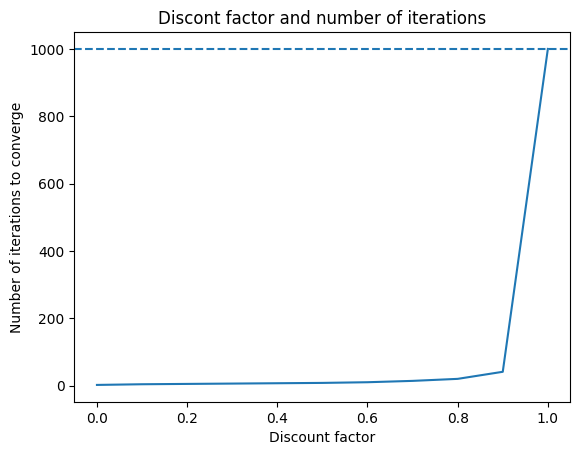

In [14]:
sns.lineplot(x=gammas, y=iterations_list)

plt.title("Discont factor and number of iterations")

plt.xlabel("Discount factor")
plt.ylabel("Number of iterations to converge")

plt.axline(xy1=(0, 1000), slope=0, linestyle='--')

plt.show()

## Reinforcement Learning (RL) (Theory for optional question 3)
Until now, we understood that knowing the MDP, specifically $p(s'|a,s)$ and $r(s,a,s')$ allows us to efficiently find the optimal policy using the value iteration algorithm. Reinforcement learning (RL) or decision making under uncertainity, however, arises from the question of making optimal decisions without knowing the true world model (the MDP in this case).

So far we have defined the value function for a policy through $V^\pi$. Let's now define the *action-value function*

$$Q^\pi(s,a) = \sum_{s'} p(s'|a,s) [r(s,a,s') + \gamma V^\pi(s')]$$

The value function and the action-value function are directly related through

$$V^\pi (s) = \max_a Q^\pi (s,a)$$

i.e, the value of taking action $a$ in state $s$ and then following the policy $\pi$ onwards. Similarly to the value function, the optimal $Q$-value equation is:

$$Q^*(s,a) = \sum_{s'} p(s'|a,s) [r(s,a,s') + \gamma V^*(s')]$$

and the relationship between $Q^*(s,a)$ and $V^*(s)$ is simply

$$V^*(s) = \max_{a\in A} Q^*(s,a).$$

#### Q-learning

Q-learning is a RL-method where the agent learns about its unknown environment (i.e., the MDP is unknown) through exploration. In each time step *t* the agent chooses an action *a* based on the current state *s*, observes the reward *r* and the next state *s'*, and repeats the process in the new state. Q-learning is then a method that allows the agent to act optimally. Here we will focus on the simplest form of Q-learning algorithms, which can be applied when all states are known to the agent, and the state and action spaces are reasonably small. This simple algorithm uses a table of Q-values for each $(s,a)$ pair, which is then updated in each time step using the update rule in step $k+1$

$$Q_{k+1}(s,a) = Q_k(s,a) + \alpha \left( r(s,a) + \gamma \max \{Q_k(s',a')\} - Q_k(s,a) \right) $$ 

where $\gamma$ is the discount factor as before, and $\alpha$ is a pre-set learning rate. It can be shown that this algorithm converges to the optimal policy of the underlying MDP for certain values of $\alpha$ as long as there  is sufficient exploration. For our case, we set a constant $\alpha=0.1$.

#### OpenAI Gym

We shall use already available simulators for different environments (worlds) using the popular [OpenAI Gym library](https://www.gymlibrary.dev/). It just implements different types of simulators including ATARI games. Although here we will only focus on simple ones, such as the **Chain enviroment** illustrated below.
![alt text](Chain.JPG)
The figure corresponds to an MDP with 5 states $S = \{1,2,3,4,5\}$ and two possible actions $A=\{a,b\}$ in each state. The arrows indicate the resulting transitions for each state-action pair, and the numbers correspond to the rewards for each transition.

## Question 3 (optional)
You are to first familiarize with the framework of [the OpenAI environments](https://www.gymlibrary.dev/), and then implement the Q-learning algorithm for the <code>NChain-v0</code> enviroment depicted above, using default parameters and a learning rate of $\gamma=0.95$. Report the final $Q^*$ table after convergence of the algorithm. For an example on how to do this, you can refer to the Q-learning of the **Frozen lake environment** (<code>q_learning_frozen_lake.ipynb</code>), uploaded on Canvas. *Hint*: start with a small learning rate.

Note that the NChain environment is not available among the standard environments, you need to load the <code>gym_toytext</code> package, in addition to the standard gym:

<code>
!pip install gym-legacy-toytext<br>
import gym<br>
import gym_toytext<br>
env = gym.make("NChain-v0")<br>
</code>

---

## Question 4

**4a)** What is the importance of exploration in reinforcement learning? Explain with an example.

**4b)** Explain what makes reinforcement learning different from supervised learning tasks such as regression or classification. 


---

### Question 4a

*The exploration plays an important role in reinforcement learning, especially in the **discovery of optimal or near-optimal policies in an environment with limited or no prior knowledge.*** In particular, it would allow an agent to take a random action sometimes, instead of taking an action always based on its current knowledge. In this way the agent will collect more experience that can be used to find better optimal policies, avoid local optima and adapt to possible environment changes.

*An example that highlights the importance of this concept could be, **training a self-driving car in a simulated urban environment.*** The vehicle is in an unknown environment (It does not know the the city layout, the position of the traffic lights or specific locations for example), and its goal is to maximize its reward in order to reach destinations as fast as possible while avoiding incident and following the traffic laws. Letting the autonomous car explore rather than only basing its decisions on its current knowledege will bring many benefits, for instance:

- form a first prior knowledge about the environment layout, the traffic patterns, the location of places and also specific optimal routes. Without a first exploration the car wouldn't have knowledege and it would take actions randomly.
- even though discovering the optimal path could be the first priority to reach the car's goal, exploration would also allow the vehicle to discover different types of paths, from a safer one to a route with less traffic. In other words, the autonomous car knowledege would be more applicable to the real world and to users' requests. 

Despite the advanteges of exploring an environment, another important aspect is to balance it with the concept of exploitation, that is using the accumulated information to maximize the expected rewards. This because if an agent focuses too much in exploring a new possible path, it will never take advantage of the knowledege acquired through the episodes to follow an optimal policy in order to reach its goals.

### Question 4b

Compared to learning paradigms like supervised learning, what makes reinforcement learning different is especially the available resources, the goal and how it is reached.

- In supervised learning, the *main objective is to predict something from given data*. We have an initial dataset with the datapoint features and the target variable, that is the value that we want to predict for a specific instance; the dataset will be used to train the algorithm in making predictions, from a real number or a category. In other words, we already have available (and labeled) information to tell the algorithm how to solve its task (regression and classification). 
- In reinforcement learning, instead, we don't have neither labeled data nor a dataset at all. Starting with no knowledge the algorithm in this case will learn from an interactive environment, *with the goal to find a policy of actions to maximize a cumulative reward signal*. The way reinforcement learning works makes it more suitable in problems where an AI has to take sequential decisions, such as self-driving cars, game playing or even more robotics.

## Question 5

**5a)** Give a summary of how a decision tree works and how it extends to random forests.

**5b)** State at least one advantage and one drawback with using random forests over decision trees.

---

### Question 5a

A decision tree is a machine learning learning algorithm that can be used both for regression and classification tasks. It consists on a binary branching structure (or binary tree) to make a decision related to the task considered: each node contains a feature comparison among the ones in the starting dataset (if a feature is a specific category or it's greater than a value, for example), and the result of such comparison determines whether we should proceed in the right or left child of the given node. By bulding the tree in this way, we will recursively partition our data in subsets based on values of the input feature to make predictions. Building a decision tree typically follows the process below:

1. we will start at a root node, with all of our examples
2. a feature from the dataset will be selected to spit the data into subset and create 2 child nodes of the trees. The criteria to determine which feature could work best to make a split is to first compute the so called *entropy*, a measure that takes into account a balance split and pure partition (how much the label of the node in that partition is disjointed); since our goal is to reduce the entropy of a split, we then calculate the *information gain*, which measures how much the entropy would be reduced selecting a specific feature.
3. we split the dataset into left and right branch, according to the choice in the 2nd step.
4. we keep repeating the process above until a termination criteria, which could be:
    - having 100% of one class in a node
    - information gain from additional splits is less than a threshold
    - number of examples would be below a threshold.

Since there are a high number of possible decision trees that can be created starting from a dataset, an idea to improve the tree model even more is to extend this concept to bulding hundrends or also thousands of other different possible trees: we can then extract a possible label of a prediction by evaluating a test set to each of them. This algorithm is called *tree ensables* or *random forest* and overcome one the biggest drawback of using a single decision tree, which is overfitting.
To make sure that each tree in the random forest will be different, 2 techinques will be used:

- instead of taking the entire dataset to start building the model, only a random sampling of data will be taken into consideration.
- for similar reasons in the first point, to not let the trees be too much highly correlated only a random subset of features will be used to build a tree (*bagging*).  

### Question 5b

As mentioned in the last question, using random forests over decision trees would lead to higher accuracy and a more robust method for the number of mutiple trees participating in the process. Furthermore, random forests does not suffer from the overfitting problem, since taking the average of all the predictions would cancels biases.

Despite the advantages, there are also drawbacks. The main drawback of using random forests is the slow performance in making a prediction, sicne every tree has to be taken into account. The processes can be time-consuming. Moreover, the model can be harder to interpret compared to a single decision tree, where you can easly make a decision following the path in the trees.


# References
Primer/text based on the following references:
* http://www.cse.chalmers.se/~chrdimi/downloads/book.pdf
* https://github.com/olethrosdc/ml-society-science/blob/master/notes.pdf